<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/14%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.drop(columns='species', inplace=True)

In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

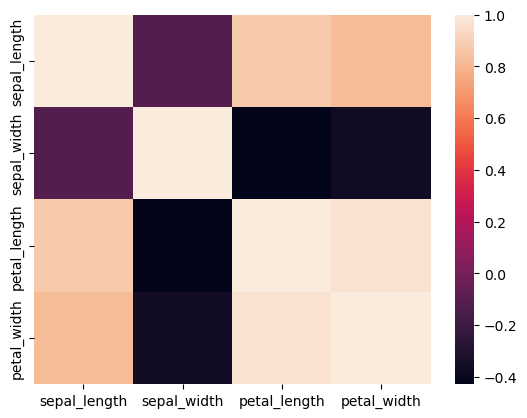

In [ ]:
sns.heatmap(iris.corr())

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('sample_data/AirPassengers.csv', parse_dates=[0])

In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


# acf

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.tsa.seasonal_decompose

In [ ]:
sm.graphics.tsa.month_plot
sm.graphics.tsa.quarter_plot
sm.graphics.tsa.seasonal_plot

In [ ]:
sm.graphics.tsa.plot_acf
sm.graphics.tsa.acf

<Axes: xlabel='Month', ylabel='#Passengers'>

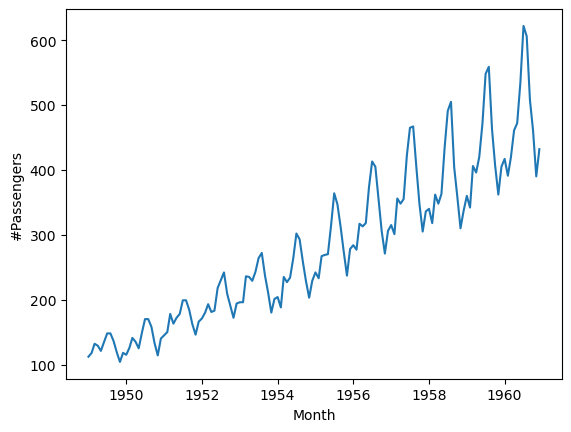

In [ ]:
sns.lineplot(data, x='Month', y='#Passengers')

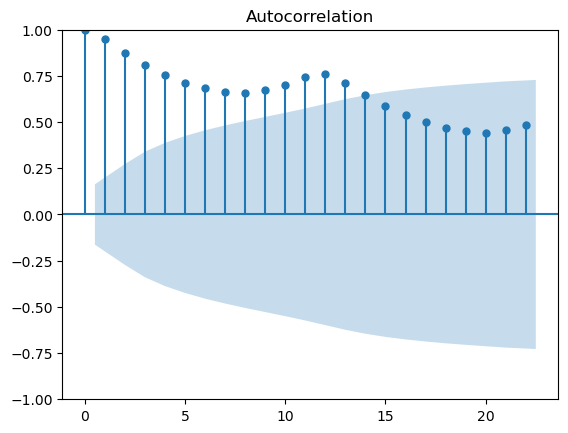

In [ ]:
acf = sm.graphics.tsa.plot_acf(data['#Passengers'])

# differencing

In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data['diff'] = data.diff()['#Passengers']

In [ ]:
import numpy as np

In [ ]:
data['pasenger_log'] = np.log(data['#Passengers'])

In [ ]:
data['pasenger_log_diff'] = data['pasenger_log'].diff(31)

In [ ]:
data

,Month,#Passengers,diff,pasenger_log,pasenger_log_diff,boxcox,boxcox_diff
0,1949-01-01,112,NaN,4.718499,NaN,6.827490,NaN
1,1949-02-01,118,6.0,4.770685,NaN,6.932822,0.105332
2,1949-03-01,132,14.0,4.882802,NaN,7.161892,0.229069
3,1949-04-01,129,-3.0,4.859812,NaN,7.114611,-0.047281
4,1949-05-01,121,-8.0,4.795791,NaN,6.983787,-0.130824
...,...,...,...,...,...,...,...
139,1960-08-01,606,-16.0,6.406880,0.577934,10.684049,-0.067404
140,1960-09-01,508,-98.0,6.230481,0.468430,10.234573,-0.449476
141,1960-10-01,461,-47.0,6.133398,0.241754,9.992159,-0.242414
142,1960-11-01,390,-71.0,5.966147,0.113944,9.582623,-0.409537


<Axes: xlabel='Month'>

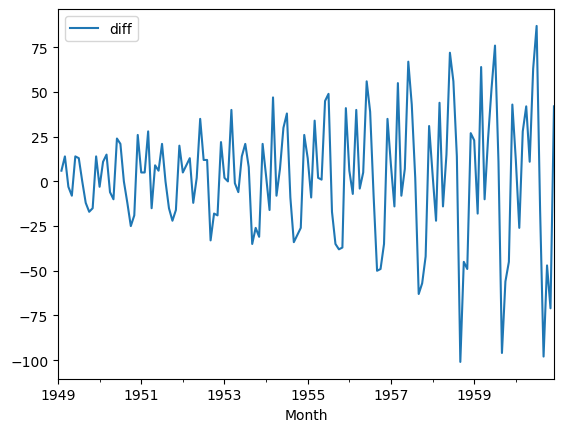

In [ ]:
data.set_index('Month')[['diff']].plot()

<Axes: xlabel='Month'>

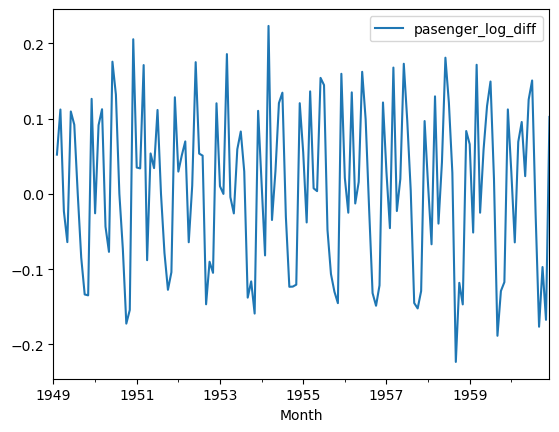

In [ ]:
data.set_index('Month')[['pasenger_log_diff']].plot()

# box-cox

In [ ]:
import scipy

In [ ]:
from scipy.cluster import hierarchy

In [ ]:
from scipy.stats import boxcox

In [ ]:
data['boxcox'] = boxcox(data['#Passengers'])[0]

In [ ]:
data['boxcox_diff'] = data['boxcox'].diff()

<Axes: xlabel='Month'>

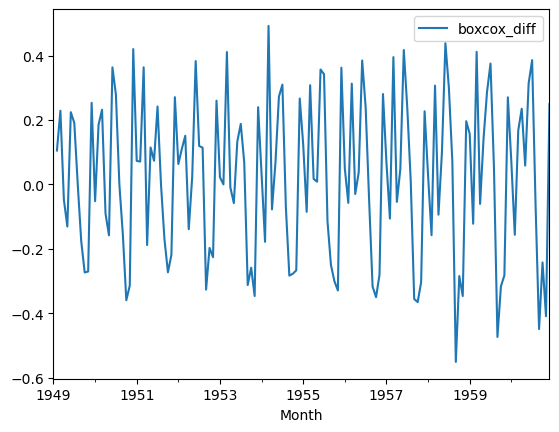

In [ ]:
data.set_index('Month')[['boxcox_diff']].plot()

# addfuller

In [ ]:
data.columns

Index(['Month', '#Passengers', 'diff', 'pasenger_log', 'pasenger_log_diff',
       'boxcox', 'boxcox_diff'],
      dtype='object')

In [ ]:
sm.tsa.adfuller(data['#Passengers'])

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
sm.tsa.adfuller(data['pasenger_log_diff'].dropna())

(-2.4971563993425474,
 0.11616773746801862,
 13,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 -286.29521133945195)

In [ ]:
sm.tsa.adfuller(data['boxcox_diff'].dropna())

(-2.8717075283173914,
 0.04873833392661849,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -234.74315733709795)

In [ ]:
귀무가설 : stationary 하지 않다. p > 0.05
대립가설 : stationary 하다.

# pacf

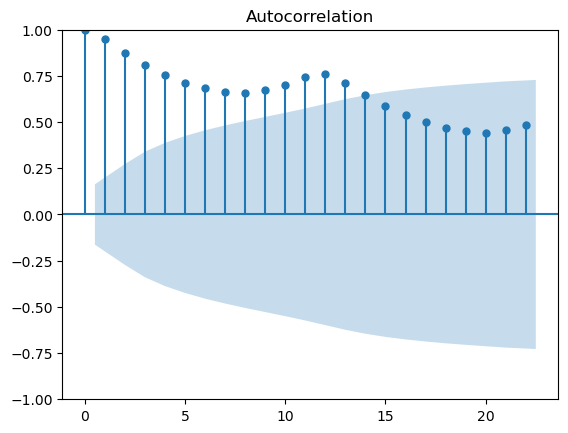

In [ ]:
acf

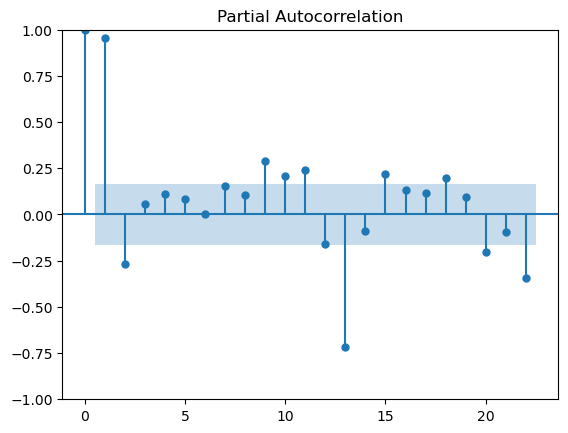

In [ ]:
pacf = sm.tsa.graphics.plot_pacf(data['#Passengers'])

# EDA

In [ ]:
data

,Month,#Passengers,diff,pasenger_log,pasenger_log_diff,boxcox,boxcox_diff
0,1949-01-01,112,NaN,4.718499,NaN,6.827490,NaN
1,1949-02-01,118,6.0,4.770685,NaN,6.932822,0.105332
2,1949-03-01,132,14.0,4.882802,NaN,7.161892,0.229069
3,1949-04-01,129,-3.0,4.859812,NaN,7.114611,-0.047281
4,1949-05-01,121,-8.0,4.795791,NaN,6.983787,-0.130824
...,...,...,...,...,...,...,...
139,1960-08-01,606,-16.0,6.406880,0.577934,10.684049,-0.067404
140,1960-09-01,508,-98.0,6.230481,0.468430,10.234573,-0.449476
141,1960-10-01,461,-47.0,6.133398,0.241754,9.992159,-0.242414
142,1960-11-01,390,-71.0,5.966147,0.113944,9.582623,-0.409537


In [ ]:
data.Month.dt.year

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: Month, Length: 144, dtype: int32

In [ ]:
data.Month.dt.month

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: Month, Length: 144, dtype: int32

In [ ]:
data.Month.dt.month_name()

0        January
1       February
2          March
3          April
4            May
         ...    
139       August
140    September
141      October
142     November
143     December
Name: Month, Length: 144, dtype: object

In [ ]:
data['year'] = data.Month.dt.year
data['month'] = data.Month.dt.month
data['month_name'] = data.Month.dt.month_name

<Axes: xlabel='month', ylabel='#Passengers'>

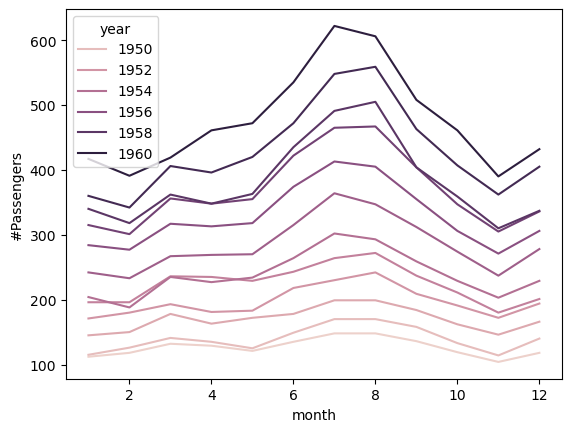

In [ ]:
sns.lineplot(data, x='month',y='#Passengers', hue='year')

<Axes: xlabel='month', ylabel='#Passengers'>

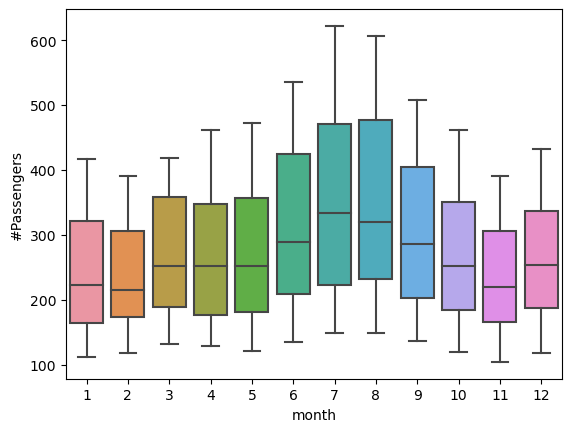

In [ ]:
sns.boxplot(data, x='month',y='#Passengers')

<Axes: xlabel='month', ylabel='#Passengers'>

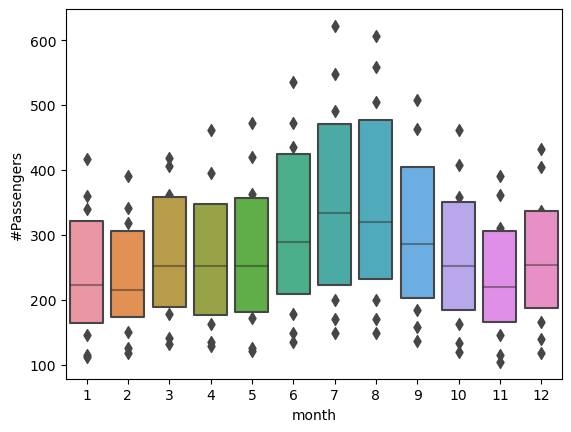

In [ ]:
sns.boxenplot(data, x='month',y='#Passengers')

<Axes: xlabel='month', ylabel='#Passengers'>

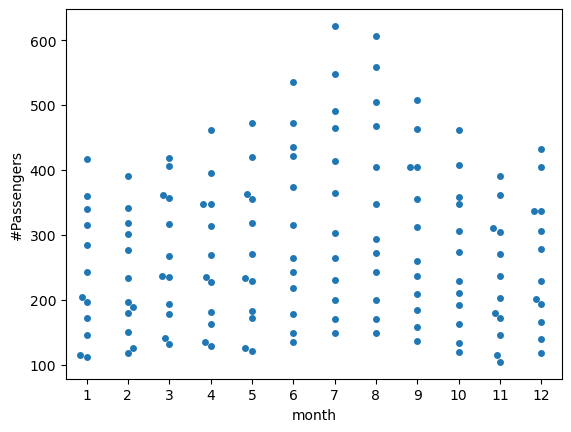

In [ ]:
sns.swarmplot(data, x='month',y='#Passengers')

<Axes: xlabel='month', ylabel='#Passengers'>

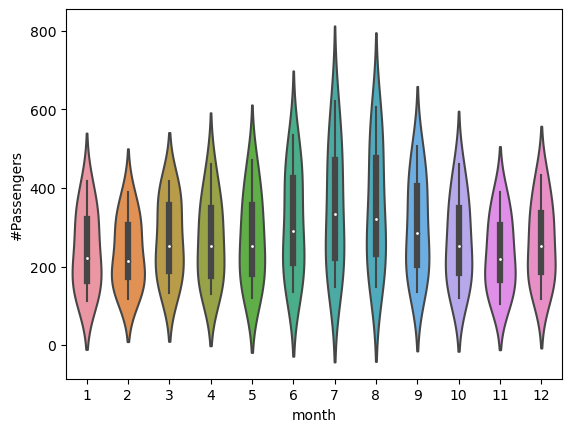

In [ ]:
sns.violinplot(data, x='month',y='#Passengers')

In [ ]:
data2 = data.set_index('Month')

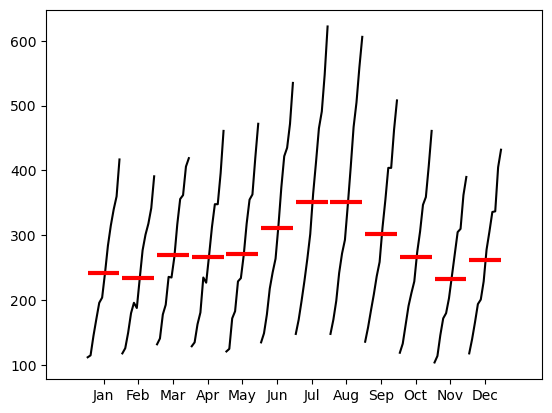

In [ ]:
mp = sm.tsa.graphics.month_plot(data2['#Passengers'])

In [ ]:
gx = data2.resample('Y')['#Passengers']

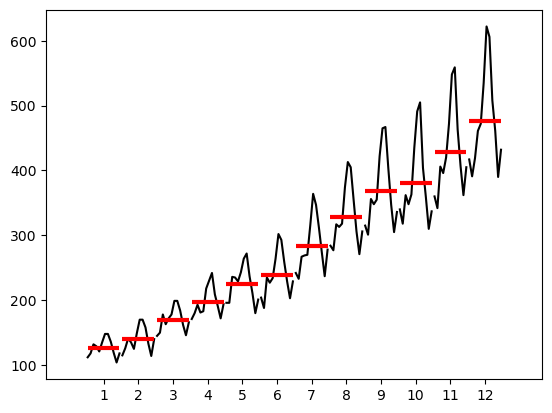

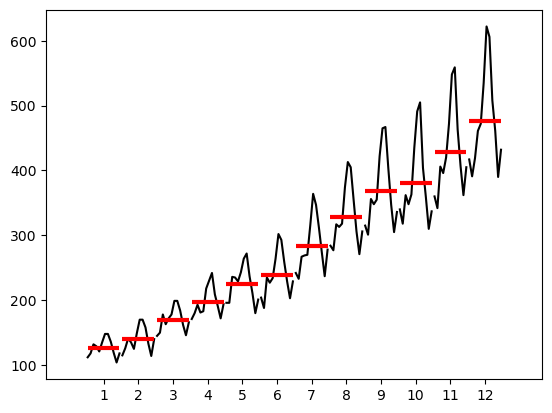

In [ ]:
sm.tsa.graphics.seasonal_plot(gx, ['1','2','3','4','5','6','7','8','9','10','11','12'])

# lag

In [ ]:
data

,Month,#Passengers,diff,pasenger_log,pasenger_log_diff,boxcox,boxcox_diff,year,month,month_name
0,1949-01-01,112,NaN,4.718499,NaN,6.827490,NaN,1949,1,<bound method PandasDelegate._add_delegate_acc...
1,1949-02-01,118,6.0,4.770685,NaN,6.932822,0.105332,1949,2,<bound method PandasDelegate._add_delegate_acc...
2,1949-03-01,132,14.0,4.882802,NaN,7.161892,0.229069,1949,3,<bound method PandasDelegate._add_delegate_acc...
3,1949-04-01,129,-3.0,4.859812,NaN,7.114611,-0.047281,1949,4,<bound method PandasDelegate._add_delegate_acc...
4,1949-05-01,121,-8.0,4.795791,NaN,6.983787,-0.130824,1949,5,<bound method PandasDelegate._add_delegate_acc...
...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,606,-16.0,6.406880,0.577934,10.684049,-0.067404,1960,8,<bound method PandasDelegate._add_delegate_acc...
140,1960-09-01,508,-98.0,6.230481,0.468430,10.234573,-0.449476,1960,9,<bound method PandasDelegate._add_delegate_acc...
141,1960-10-01,461,-47.0,6.133398,0.241754,9.992159,-0.242414,1960,10,<bound method PandasDelegate._add_delegate_acc...
142,1960-11-01,390,-71.0,5.966147,0.113944,9.582623,-0.409537,1960,11,<bound method PandasDelegate._add_delegate_acc...


In [ ]:
data['#Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
data['#Passengers'].shift(2)

0        NaN
1        NaN
2      112.0
3      118.0
4      132.0
       ...  
139    535.0
140    622.0
141    606.0
142    508.0
143    461.0
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
data['#Passengers'].shift(-2)

0      132.0
1      129.0
2      121.0
3      135.0
4      148.0
       ...  
139    461.0
140    390.0
141    432.0
142      NaN
143      NaN
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
data['#Passengers']

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
data['#Passengers'].shift(1)

0        NaN
1      112.0
2      118.0
3      132.0
4      129.0
       ...  
139    622.0
140    606.0
141    508.0
142    461.0
143    390.0
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
# pd.plotting.scatter_matrix
# sns.pairplot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

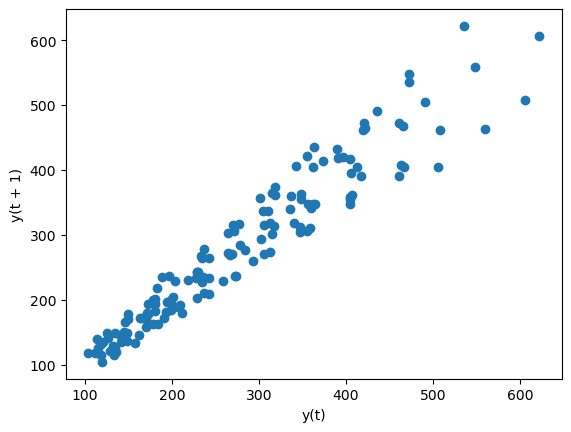

In [ ]:
pd.plotting.lag_plot(data['#Passengers'])

In [ ]:
data['lag'] = data['#Passengers'].shift(1)

In [ ]:
data

,Month,#Passengers,diff,pasenger_log,pasenger_log_diff,boxcox,boxcox_diff,year,month,month_name,lag
0,1949-01-01,112,NaN,4.718499,NaN,6.827490,NaN,1949,1,<bound method PandasDelegate._add_delegate_acc...,NaN
1,1949-02-01,118,6.0,4.770685,NaN,6.932822,0.105332,1949,2,<bound method PandasDelegate._add_delegate_acc...,112.0
2,1949-03-01,132,14.0,4.882802,NaN,7.161892,0.229069,1949,3,<bound method PandasDelegate._add_delegate_acc...,118.0
3,1949-04-01,129,-3.0,4.859812,NaN,7.114611,-0.047281,1949,4,<bound method PandasDelegate._add_delegate_acc...,132.0
4,1949-05-01,121,-8.0,4.795791,NaN,6.983787,-0.130824,1949,5,<bound method PandasDelegate._add_delegate_acc...,129.0
...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,606,-16.0,6.406880,0.577934,10.684049,-0.067404,1960,8,<bound method PandasDelegate._add_delegate_acc...,622.0
140,1960-09-01,508,-98.0,6.230481,0.468430,10.234573,-0.449476,1960,9,<bound method PandasDelegate._add_delegate_acc...,606.0
141,1960-10-01,461,-47.0,6.133398,0.241754,9.992159,-0.242414,1960,10,<bound method PandasDelegate._add_delegate_acc...,508.0
142,1960-11-01,390,-71.0,5.966147,0.113944,9.582623,-0.409537,1960,11,<bound method PandasDelegate._add_delegate_acc...,461.0


In [ ]:
data[['lag', '#Passengers']]

,lag,#Passengers
0,NaN,112
1,112.0,118
2,118.0,132
3,132.0,129
4,129.0,121
...,...,...
139,622.0,606
140,606.0,508
141,508.0,461
142,461.0,390


<Axes: xlabel='lag', ylabel='#Passengers'>

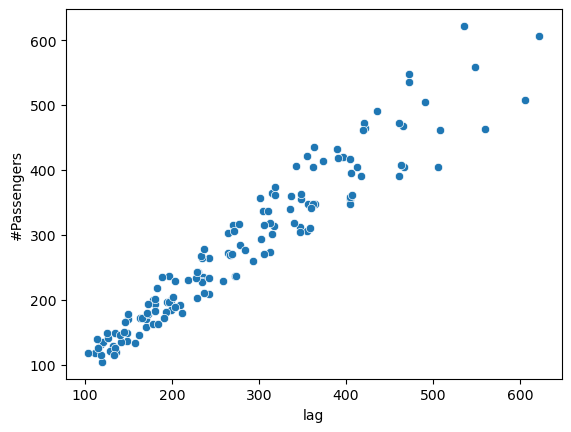

In [ ]:
sns.scatterplot(data, x='lag', y='#Passengers')

<Axes: xlabel='lag', ylabel='#Passengers'>

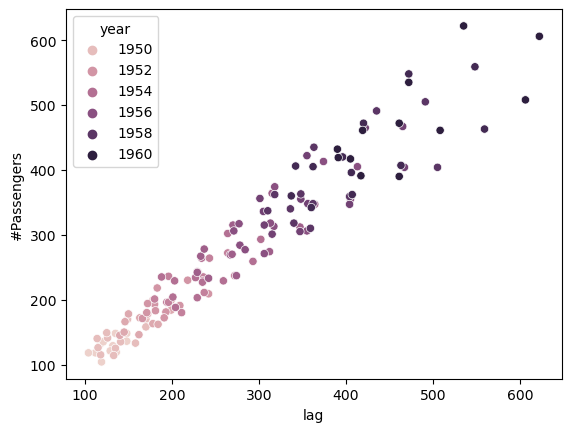

In [ ]:
sns.scatterplot(data, x='lag', y='#Passengers', hue='year')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

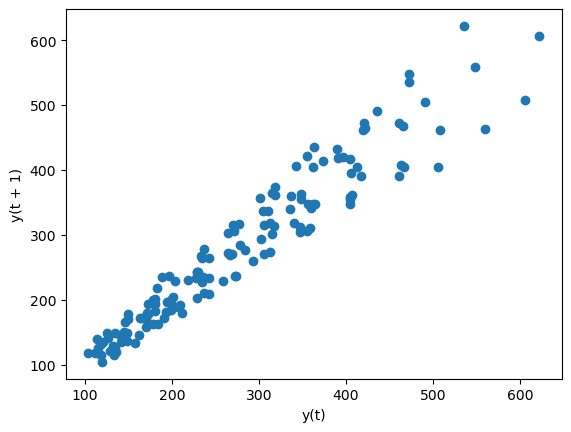

In [ ]:
pd.plotting.lag_plot(data['#Passengers'])

# autocorreation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

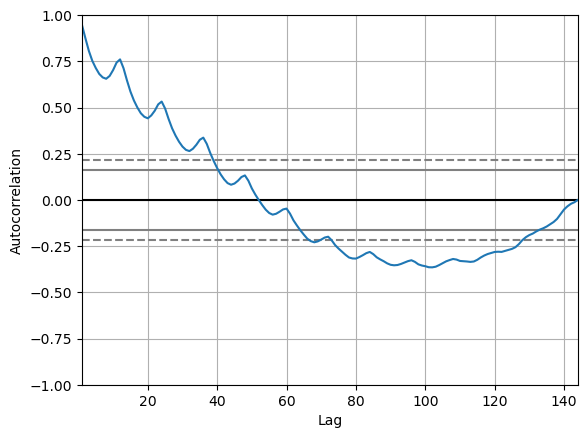

In [ ]:
pd.plotting.autocorrelation_plot(data['#Passengers'])

# moving average

In [ ]:
data['#Passengers'].rolling(3).mean()

0             NaN
1             NaN
2      120.666667
3      126.333333
4      127.333333
          ...    
139    587.666667
140    578.666667
141    525.000000
142    453.000000
143    427.666667
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
data['#Passengers'].rolling(3, center=True).mean()

0             NaN
1      120.666667
2      126.333333
3      127.333333
4      128.333333
          ...    
139    578.666667
140    525.000000
141    453.000000
142    427.666667
143           NaN
Name: #Passengers, Length: 144, dtype: float64

# weighted moving average

## apply : series

In [ ]:
weight = np.array([1,2,3])

In [ ]:
sum_weight = np.sum(weight)

In [ ]:
data['#Passengers'].rolling(3).apply(lambda x: np.sum(weight*x)/sum_weight)

0             NaN
1             NaN
2      124.000000
3      128.166667
4      125.500000
          ...    
139    599.500000
140    559.666667
141    500.833333
142    433.333333
143    422.833333
Name: #Passengers, Length: 144, dtype: float64

In [ ]:
temp = pd.DataFrame({'x':[10,15,10,20,30,20]})

In [ ]:
temp

,x
0,10
1,15
2,10
3,20
4,30
5,20


In [ ]:
temp['x'].rolling(3).mean()

0          NaN
1          NaN
2    11.666667
3    15.000000
4    20.000000
5    23.333333
Name: x, dtype: float64

In [ ]:
(10 + 15 + 10)/3

11.666666666666666

In [ ]:
w = np.array([1,2,3])

In [ ]:
temp['x'].rolling(3).apply(lambda x:np.sum(x))

0     NaN
1     NaN
2    35.0
3    45.0
4    60.0
5    70.0
Name: x, dtype: float64

In [ ]:
temp['x'].rolling(3).apply(lambda x:np.sum(w*x))

0      NaN
1      NaN
2     70.0
3     95.0
4    140.0
5    140.0
Name: x, dtype: float64

In [ ]:
temp['x'].rolling(3).apply(lambda x:np.sum(w*x) / np.sum(w))

0          NaN
1          NaN
2    11.666667
3    15.833333
4    23.333333
5    23.333333
Name: x, dtype: float64

In [ ]:
temp['x'].ewm(3)

ExponentialMovingWindow [com=3,min_periods=1,adjust=True,ignore_na=False,axis=0,method=single]

In [ ]:
temp['x'].ewm(3).mean()

0    10.000000
1    12.857143
2    11.621622
3    14.685714
4    19.705506
5    19.795070
Name: x, dtype: float64

# exponential smoothing

## holdout (의미상)

In [ ]:
tsa.E

In [ ]:
percent = 0.8

In [ ]:
data.set_index('Month', inplace=True)

In [ ]:
train = data.iloc[:int(len(data)*percent)]
test = data.iloc[int(len(data)*percent):]

In [ ]:
train

,#Passengers,diff,pasenger_log,pasenger_log_diff,boxcox,boxcox_diff,year,month,month_name,lag
Month,,,,,,,,,,
1949-01-01,112,NaN,4.718499,NaN,6.827490,NaN,1949,1,<bound method PandasDelegate._add_delegate_acc...,NaN
1949-02-01,118,6.0,4.770685,NaN,6.932822,0.105332,1949,2,<bound method PandasDelegate._add_delegate_acc...,112.0
1949-03-01,132,14.0,4.882802,NaN,7.161892,0.229069,1949,3,<bound method PandasDelegate._add_delegate_acc...,118.0
1949-04-01,129,-3.0,4.859812,NaN,7.114611,-0.047281,1949,4,<bound method PandasDelegate._add_delegate_acc...,132.0
1949-05-01,121,-8.0,4.795791,NaN,6.983787,-0.130824,1949,5,<bound method PandasDelegate._add_delegate_acc...,129.0
...,...,...,...,...,...,...,...,...,...,...
1958-03-01,362,44.0,5.891644,0.042319,9.403432,0.307022,1958,3,<bound method PandasDelegate._add_delegate_acc...,318.0
1958-04-01,348,-14.0,5.852202,0.109199,9.309366,-0.094067,1958,4,<bound method PandasDelegate._add_delegate_acc...,362.0
1958-05-01,363,15.0,5.894403,0.281275,9.410032,0.100666,1958,5,<bound method PandasDelegate._add_delegate_acc...,348.0


In [ ]:
m = sm.tsa.Holt(train['#Passengers'])

C:\Users\sunde\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
x = m.fit()

In [ ]:
x.forecast(10)

1958-08-01    494.215905
1958-09-01    497.696389
1958-10-01    501.176874
1958-11-01    504.657358
1958-12-01    508.137842
1959-01-01    511.618326
1959-02-01    515.098810
1959-03-01    518.579294
1959-04-01    522.059778
1959-05-01    525.540263
Freq: MS, dtype: float64

In [ ]:
dir(m)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bounds',
 '_boxcox',
 '_check_blocked_keywords',
 '_check_bound_feasibility',
 '_check_bounds',
 '_check_kwargs',
 '_construct_bounds',
 '_data',
 '_data_attr',
 '_enforce_bounds',
 '_estimate_level',
 '_estimate_seasonal',
 '_estimate_trend',
 '_fit_collinear',
 '_fit_zeros',
 '_fixed_parameters',
 '_formula_max_endog',
 '_get_exog_names',
 '_get_index_label_loc',
 '_get_index_loc',
 '_get_init_kwds',
 '_get_prediction_index',
 '_get_starting_values',
 '_handle_data',
 '_index',
 '_index_dates',
 '_index_freq',
 '_index_generated',
 '_index_inferred_freq',
 '_index_int64',
 '_index_none',
 '_init_dates',
 '_init_keys',

In [ ]:
x.summary()

Dep. Variable:,#Passengers,No. Observations:,144
Model:,SimpleExpSmoothing,SSE,163003.353
Optimized:,True,AIC,1016.567
Trend:,None,BIC,1022.506
Seasonal:,None,AICC,1016.854
Seasonal Periods:,None,Date:,"Sun, 16 Jul 2023"
Box-Cox:,False,Time:,16:54:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,112.00000,l.0,True


In [ ]:
m = sm.tsa.SimpleExpSmoothing(data['#Passengers']).fit()

In [ ]:
m.forecast

In [ ]:
m.sum

In [ ]:
sm.tsa.Holt
sm.tsa.ExponentialSmoothing